# Exercise 9 - Numerical

### Tone Alsvik Finstad

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import scipy as sp
from scipy.fftpack import fft2, ifft2, fftfreq
from matplotlib.colors import LogNorm
from scipy.integrate import odeint

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

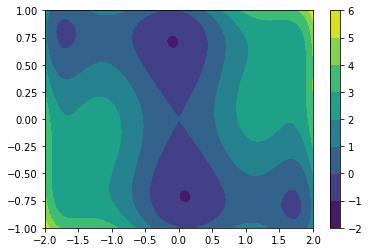

In [2]:
def f(params):
    x, y = params
    return ((4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2)

x=np.linspace(-2,2,100)
y=np.linspace(-1,1,100)
xx, yy = np.meshgrid(x,y)
plt.contourf(xx,yy,f([xx,yy]))
plt.colorbar()
plt.show()

In [3]:
init=[0, 0.5]  #Starting point based on the plot above
result=optimize.minimize(f,init)
if result.success:
    print(f"Minima: {result.x}")
    print(f"Value in point:{f(result.x)}")
else:
    raise ValueError(result.message)
    
    
init=[0, -0.5]  #Starting point based on the plot above
result=optimize.minimize(f,init)
if result.success:
    print(f"Minima: {result.x}")
    print(f"Value in point:{f(result.x)}")
else:
    raise ValueError(result.message)
    
init=[0, 0]  #Starting point (0,0)
result=optimize.minimize(f,init)
if result.success:
    print(f"Minima: {result.x}")
    print(f"Value in point:{f(result.x)}")
else:
    raise ValueError(result.message)


Minima: [-0.08984202  0.71265644]
Value in point:-1.031628453489866
Minima: [ 0.08984201 -0.71265645]
Value in point:-1.0316284534898557
Minima: [0. 0.]
Value in point:0.0


An initial guess of (0,0) doesn't find the global minimas, as it is a local minima. In the plot it appears to be a saddle point, which explains why this is a poor starting point.  

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\Omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

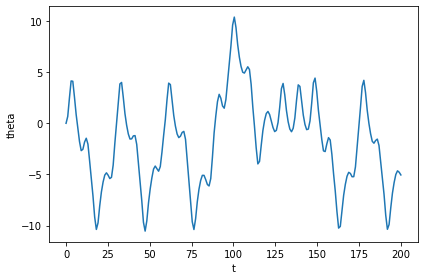

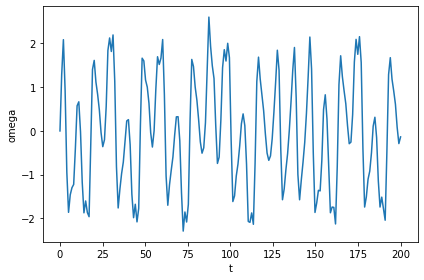

In [4]:
theta_0=0
omega_0=0
Q=2.0
d=1.5
Omega=0.65


def derivative(y_0 , t):
    theta=y_0[0]
    omega=y_0[1]
    d_theta=omega
    d_omega=-(1/Q)*omega + np.sin(theta) + d*np.cos(Omega*t)
    return [d_theta, d_omega]


# define the interval
time_vec = np.linspace(0, 200, 200)

# call the odeint() method
y = odeint(derivative, y0=[theta_0, omega_0], t=time_vec)

# plot the functions
plt.plot(time_vec, y[:,0])
plt.xlabel('t')
plt.ylabel('theta')
plt.tight_layout()
plt.show()
plt.plot(time_vec, y[:,1])
plt.xlabel('t')
plt.ylabel('omega')
plt.tight_layout()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

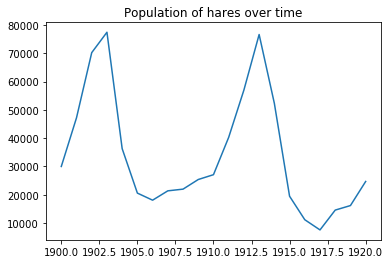

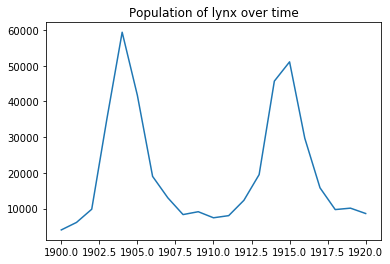

0.47619047619047616
-0.47619047619047616


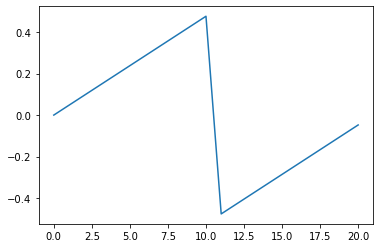

0.47619047619047616
-0.47619047619047616


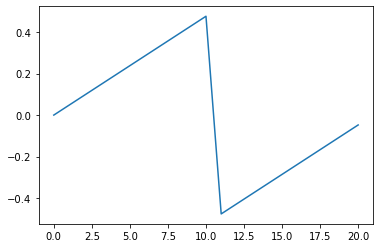

In [5]:
file_name = "populations.txt"
data = pd.read_csv(file_name, sep="\t")

plt.plot(data["# year"],data["hare"])
plt.title("Population of hares over time")
plt.show()
plt.plot(data["# year"],data["lynx"])
plt.title("Population of lynx over time")
plt.show()


#Finding the period for the maximas

hare_freq=fftfreq(data["hare"].size, d=1)
print(hare_freq[10])
print(hare_freq[11])
plt.plot(hare_freq)
plt.show()

lynx_freq=fftfreq(data["lynx"].size, d=1)
print(lynx_freq[10])
print(lynx_freq[11])
plt.plot(lynx_freq)
plt.show()



The period of both lynx and hare is 10.5 (where the frequency plot is 0). This seems resonable when comparing to the plots of the population. 

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

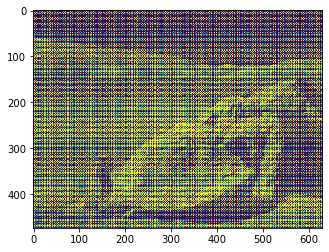

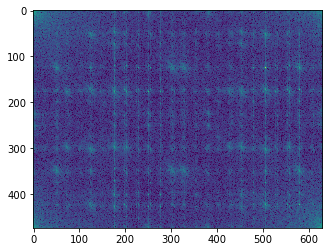

In [11]:
x=plt.imread("images/moonlanding.png")
plt.imshow(x)
plt.show()

x_fourier=fft2(np.array(x))
plt.imshow(np.abs(x_fourier), norm=LogNorm(vmin=5))
plt.show()

fraction=0.1 #keeping fraction
im_fft2=x_fourier.copy()
rows, columns = im_fft2.shape
im_fft2[int(rows*fraction):int(rows*(1-fraction))]=0
im_fft2[:,int(columns*fraction):int(columns*(1-fraction))]=0

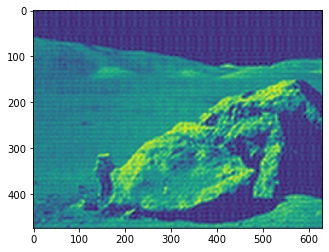

In [12]:
im_new=ifft2(im_fft2).real
plt.imshow(im_new)
plt.show()